## Instalacja bibliotek

W pracach domowych będziemy korzystać tylko z bibliotek wymienionych niżej:

VS Code + Jupyter Extension

conda create -n "psio-2023" python=3.11

conda info --envs

conda activate psio-2023

%pip install numpy scipy matplotlib opencv-python scikit-image


## Macierze numpy
### Szachownica
Przy pomocy macierzy numpy stwórz szachownicę o wymiarach AxA. Pola czarne powinny mieć wartość 0, a białe 255.

https://numpy.org/doc/stable/user/basics.indexing.html

Elapsed time:  0.010318756103515625


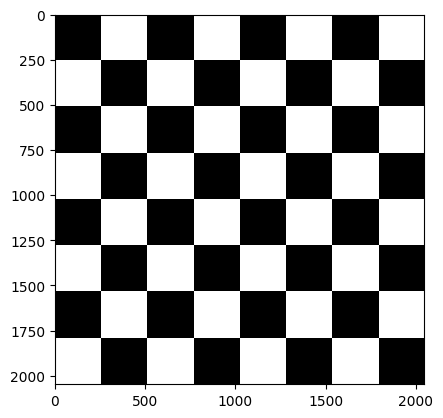

In [65]:
import matplotlib.pyplot as plt
import numpy as np
import time


A = 2048
array = np.empty((A, A), dtype=np.uint8)

start = time.time()

# Umieść swoje rozwiązanie tutaj
square_row = 8
square_size = A // square_row
for i in range(square_row):
    for j in range(square_row):
        if (j % 2 == 0 and i % 2 == 0) or ( i % 2 != 0 and j % 2 != 0):
            array[ j * square_size : (j+1) * square_size, i * square_size : (i+1) * square_size ] = 0
        else:
            array[ j * square_size : (j+1) * square_size, i * square_size : (i+1) * square_size ] = 255

print("Elapsed time: ", time.time() - start)
plt.imshow(array, cmap='gray', interpolation='nearest')
plt.show()


## Plus

Przy pomocy macierzy numpy stwórz plus o wymiarach AxA. Środek powinien być tłem. Postaraj się korzystać jedynie z indeksowania macierzami numpy.

Elapsed time:  0.08790898323059082


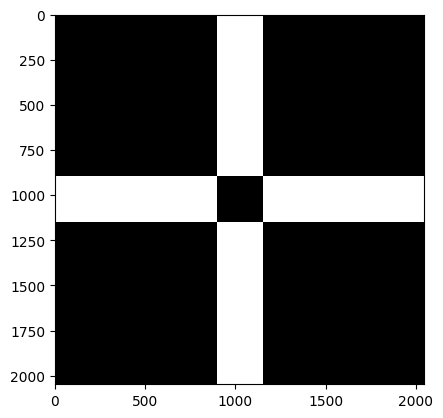

In [92]:
import matplotlib.pyplot as plt
import numpy as np
import time


A = 2048
thicknes = 256
array = np.empty((A, A), dtype=np.uint8)
start = time.time()

# Umieść swoje rozwiązanie tutaj
x_start_white = (A // 2) - (thicknes // 2) 
x_end_white = (A // 2) + (thicknes // 2)
y_end = (A // 2) - ( thicknes // 2)

array[0 : y_end , x_start_white : x_end_white ] = 255

array += np.rot90(array, k = 1)
array += np.rot90(array, k = 2)
array += np.rot90(array, k = 3)

print("Elapsed time: ", time.time() - start)
plt.imshow(array, cmap='gray', interpolation='nearest')
plt.show()


## Obrazy

Wczytaj obrazy (skimage/cv2) z dane/image_1.png i dane/image_2.png. Następnie wyświetl je obok siebie tak jak na poniższym obrazku. Pamiętaj o dodaniu tytułów do obrazów.

Obraz 3 powinien być sumą obrazów 1 i 2 podzieloną przez 2.

Wiersz pierwszy powinien zawierać obrazy RGB, wiersz drugi powinien zawierać te same obrazy, ale w skali szarości.

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html#examples-using-matplotlib-pyplot-imshow

(256, 256, 3) uint8 4 238
(256, 256, 3) uint8 2 223
(256, 256, 3) uint8 8 217


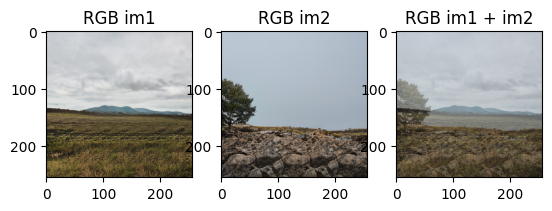

In [138]:
import cv2
import skimage
import matplotlib.pyplot as plt

# Umieść swoje rozwiązanie tutaj

obraz1 = cv2.imread("image_1.png").astype(np.uint8)
obraz1 = cv2.cvtColor(obraz1, cv2.COLOR_BGR2RGB)
print(obraz1.shape, obraz1.dtype, obraz1.min(), obraz1.max())

obraz2 = cv2.imread("image_2.png").astype(np.uint8)
obraz2 = cv2.cvtColor(obraz2, cv2.COLOR_BGR2RGB)
print(obraz2.shape, obraz2.dtype, obraz2.min(), obraz2.max())

obraz3 = np.zeros((obraz1.shape[0],obraz1.shape[1],3), dtype= np.uint8)
obraz3 = cv2.cvtColor(obraz3, cv2.COLOR_BGR2RGB)

obraz3 += obraz1 //2
obraz3 += obraz2 //2

obraz3.astype(np.uint8)


plt.subplot(1,3,1)
plt.title("RGB im1")
plt.imshow(obraz1)

plt.subplot(1,3,2)
plt.title("RGB im2")
plt.imshow(obraz2)

plt.subplot(1,3,3)
plt.title("RGB im1 + im2")
plt.imshow(obraz3)
